In [1]:
import sys
sys.path.append('../')

import importlib as imp
from shash.shash_torch import Shash
import scipy
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

# test SHASH code
def f(v):
    return dist.prob(v).numpy()

a = -100.
b = 1.5
dist = Shash(np.asarray([[1.1, 0.4, 3.0, 4],]))
cdf, _ = integrate.quad(f, a, b)
rvs = dist.rvs(size=100_000_000).numpy()
epsilon = 1.0e-3

print(cdf, dist.cdf(1.5).numpy()[0])
print(np.median(rvs), dist.median().numpy()[0])
print(np.var(rvs), dist.var().numpy()[0])
print(scipy.stats.skew(rvs), dist.skewness().numpy()[0])
print(np.mean(rvs), dist.mean().numpy()[0])

assert np.abs(cdf - dist.cdf(b).numpy()) < epsilon
assert np.abs(np.median(rvs) - dist.median().numpy()) < epsilon
assert np.abs(np.var(rvs) - dist.var().numpy()) < epsilon
assert np.abs(scipy.stats.skew(rvs) - dist.skewness().numpy()) < epsilon
assert np.abs(np.mean(rvs) - dist.mean().numpy()) < epsilon


0.7088457243259941 0.708845753593282
1.428925139402802 1.428926692774332
0.010966000340200737 0.010966142017543846
0.2178459158216284 0.21789566633979668
1.4354768514509346 1.4354809539144437


1.0646059675733432 1.0646745795824146


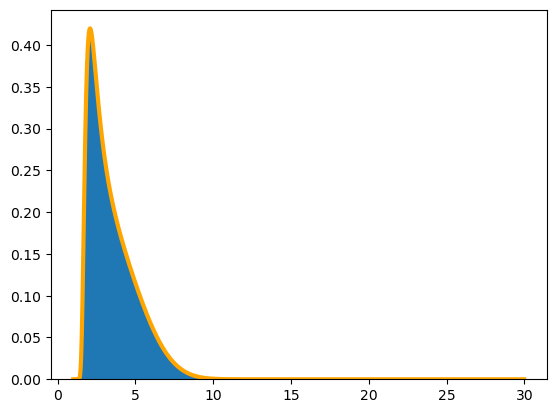

In [2]:
dist = Shash(np.asarray([[1.1, 0.4, 3.0, 1.3],]))
rvs = dist.rvs(size=100_000_000).numpy()
print(scipy.stats.skew(rvs), dist.skewness().numpy()[0])

x =np.arange(1.0, 30.0, .01)
plt.hist(rvs, x, density=True)
plt.plot(x, dist.prob(x), color="orange", linewidth=3)
plt.show()